# GEOF-322 b)

In [1]:
import proplot as plot
import pandas as pd
import numpy as np

plot.rc.cycle = 'dARK2'
plot.rc['font.size'] = 13

# 1) Data processing

First: read in the data

In [3]:
#for day in r
FLUX = ((pd.read_csv('TOA5_2068.Flux1.dat',header=1,low_memory= False).iloc[2:]
            .drop(['RECORD'],axis=1)
            .assign(time = lambda X : pd.to_datetime(X['TIMESTAMP']))
            .set_index('time').drop('TIMESTAMP',axis=1)).apply(lambda x:x.astype(float)))

In [4]:
AWS = (pd.read_csv('CR1000_1434_Minutt.dat',header=1).iloc[338:].drop(['RECORD',
                                                                            'ID',
                                                                            'BattV_Min',
                                                                            'BattV_TMn'],axis=1)
            .assign(time = lambda X : pd.to_datetime(X['TIMESTAMP'])).set_index('time')
            .drop('TIMESTAMP',axis=1)
            .apply(lambda x:x.astype(float)))

### Need to despike the data

We use the diag_vind_1: And first plot a histogram of this

/home/kko033/.conda/envs/kjersti_precip/lib/python3.7/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)


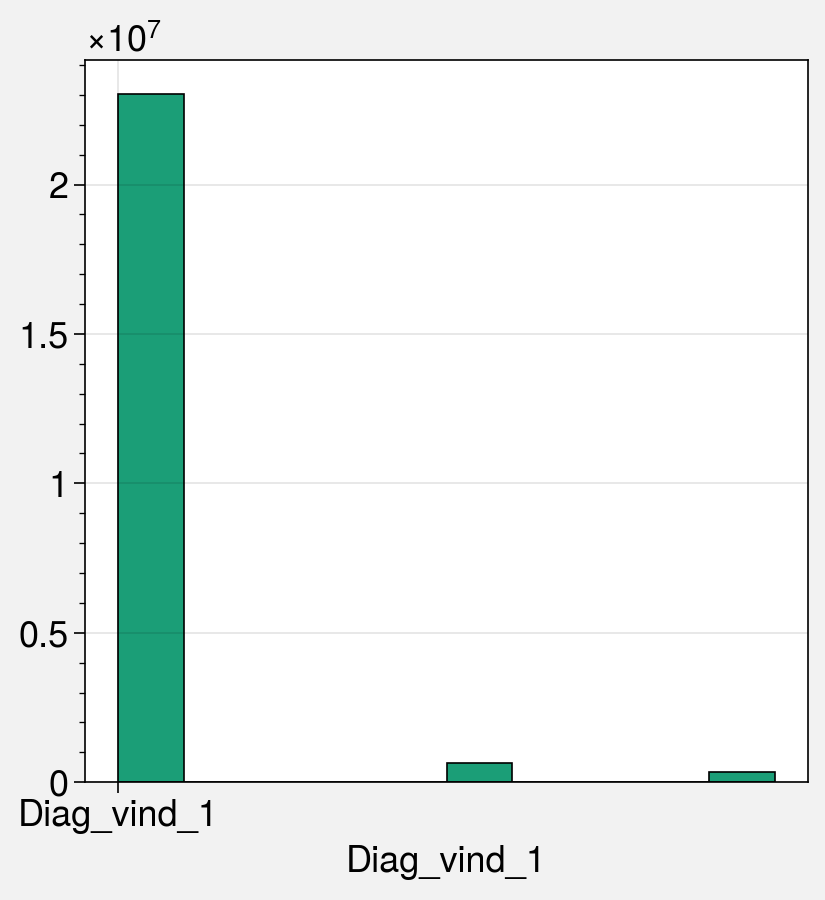

In [5]:
fig,ax = plot.subplots()
a = ax.hist(FLUX.Diag_vind_1)

In [6]:
FLUX_despike = FLUX.where(FLUX.Diag_vind_1<800)

/home/kko033/.conda/envs/kjersti_precip/lib/python3.7/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)


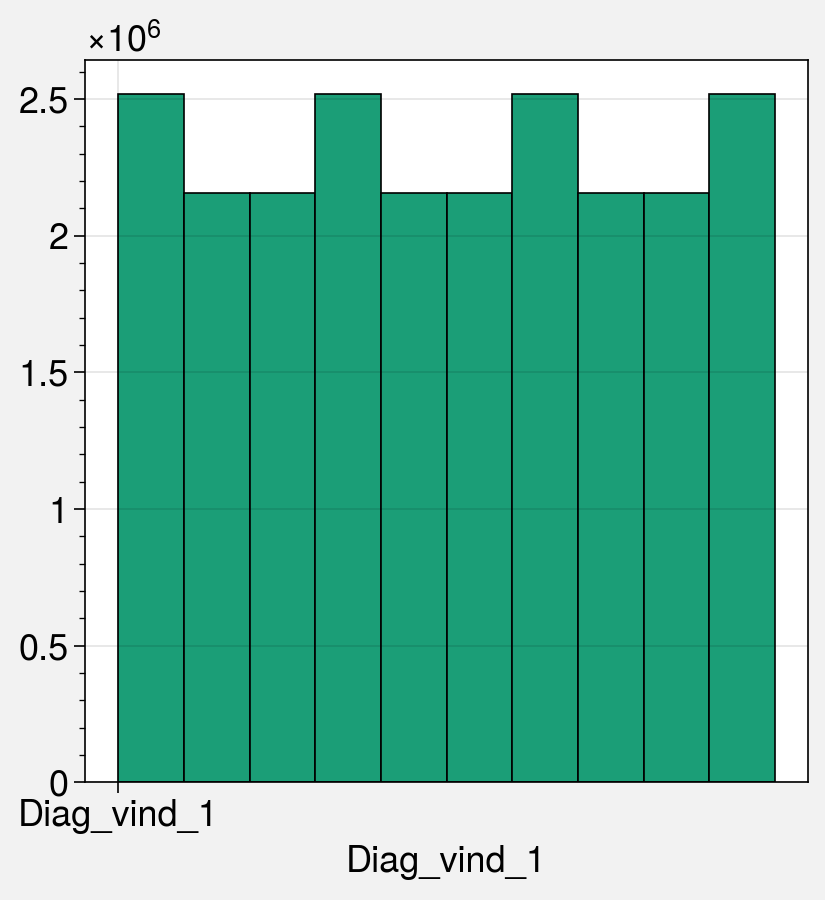

In [7]:
fig,ax = plot.subplots()
a = ax.hist(FLUX_despike.Diag_vind_1)

In [8]:
mask = np.abs(FLUX_despike['Diag_vind_1']) < 3 * np.abs(FLUX_despike['Diag_vind_1']).std()
FLUX = FLUX_despike.where(FLUX_despike[mask].Uz_1_mps.abs()<0.1)

In [9]:
FLUX = FLUX.query('index.dt.month==10')

In [10]:
FLUX.describe()

Ux_1_mps      Uy_1_mps      Uz_1_mps  T_sonic_1_deg_C  \
count  1.114101e+07  1.114101e+07  1.114101e+07     1.114101e+07   
mean  -2.675411e-01  2.896140e-01 -1.192481e-02     7.637090e+00   
std    8.288563e-01  7.708202e-01  5.004145e-02     5.021951e+00   
min   -1.068450e+01 -1.192100e+01 -9.975000e-02    -2.458000e+00   
25%   -7.262501e-01 -7.525001e-02 -5.150000e-02     3.361000e+00   
50%   -4.180000e-01  4.117500e-01 -1.500000e-02     7.444000e+00   
75%    5.250000e-03  7.630000e-01  2.400000e-02     1.138000e+01   
max    1.444900e+01  9.884501e+00  9.975000e-02     1.971000e+01   

        Diag_vind_1   CO2_mmolpm3   H2O_mmolpm3  Pressure_kPa     Diag_gass  \
count  1.114101e+07  1.114101e+07  1.114101e+07  1.114101e+07  1.114101e+07   
mean   2.750212e+01  2.080398e+01  5.153788e+02  1.007708e+02  2.513946e+02   
std    1.616424e+01  6.789234e+00  4.319285e+02  1.213717e+00  2.711343e+00   
min    0.000000e+00 -2.016519e+01 -2.107735e+04  9.863260e+01  2.460000e+02   
25%    1.300000e+01  1.747539e+01  3.267037e+02  9.969073e+01  2.490000e+02   
50%    2.800000e+01  1.834022e+01  4.021560e+02  1.007985e+02  2.500000e+02   
75%    4.100000e+01  2.633220e+01  5.210018e+02  1.021342e+02  2.550000e+02   
max    5.500000e+01  4.818165e+03  6.004742e+03  1.027386e+02  2.550000e+02   

           T1_deg_C      T2_deg_C  
count  1.114101e+07  1.114101e+07  
mean  -7.461144e+03 -3.491367e+02  
std    1.780145e+03  1.897027e+03  
min   -7.999000e+03 -3.892000e+03  
25%   -7.999000e+03 -2.212000e+03  
50%   -7.999000e+03 -2.227000e+02  
75%   -7.999000e+03  1.511000e+03  
max    1.686000e+03  2.120000e+03

In [12]:
from savefig  import savefig

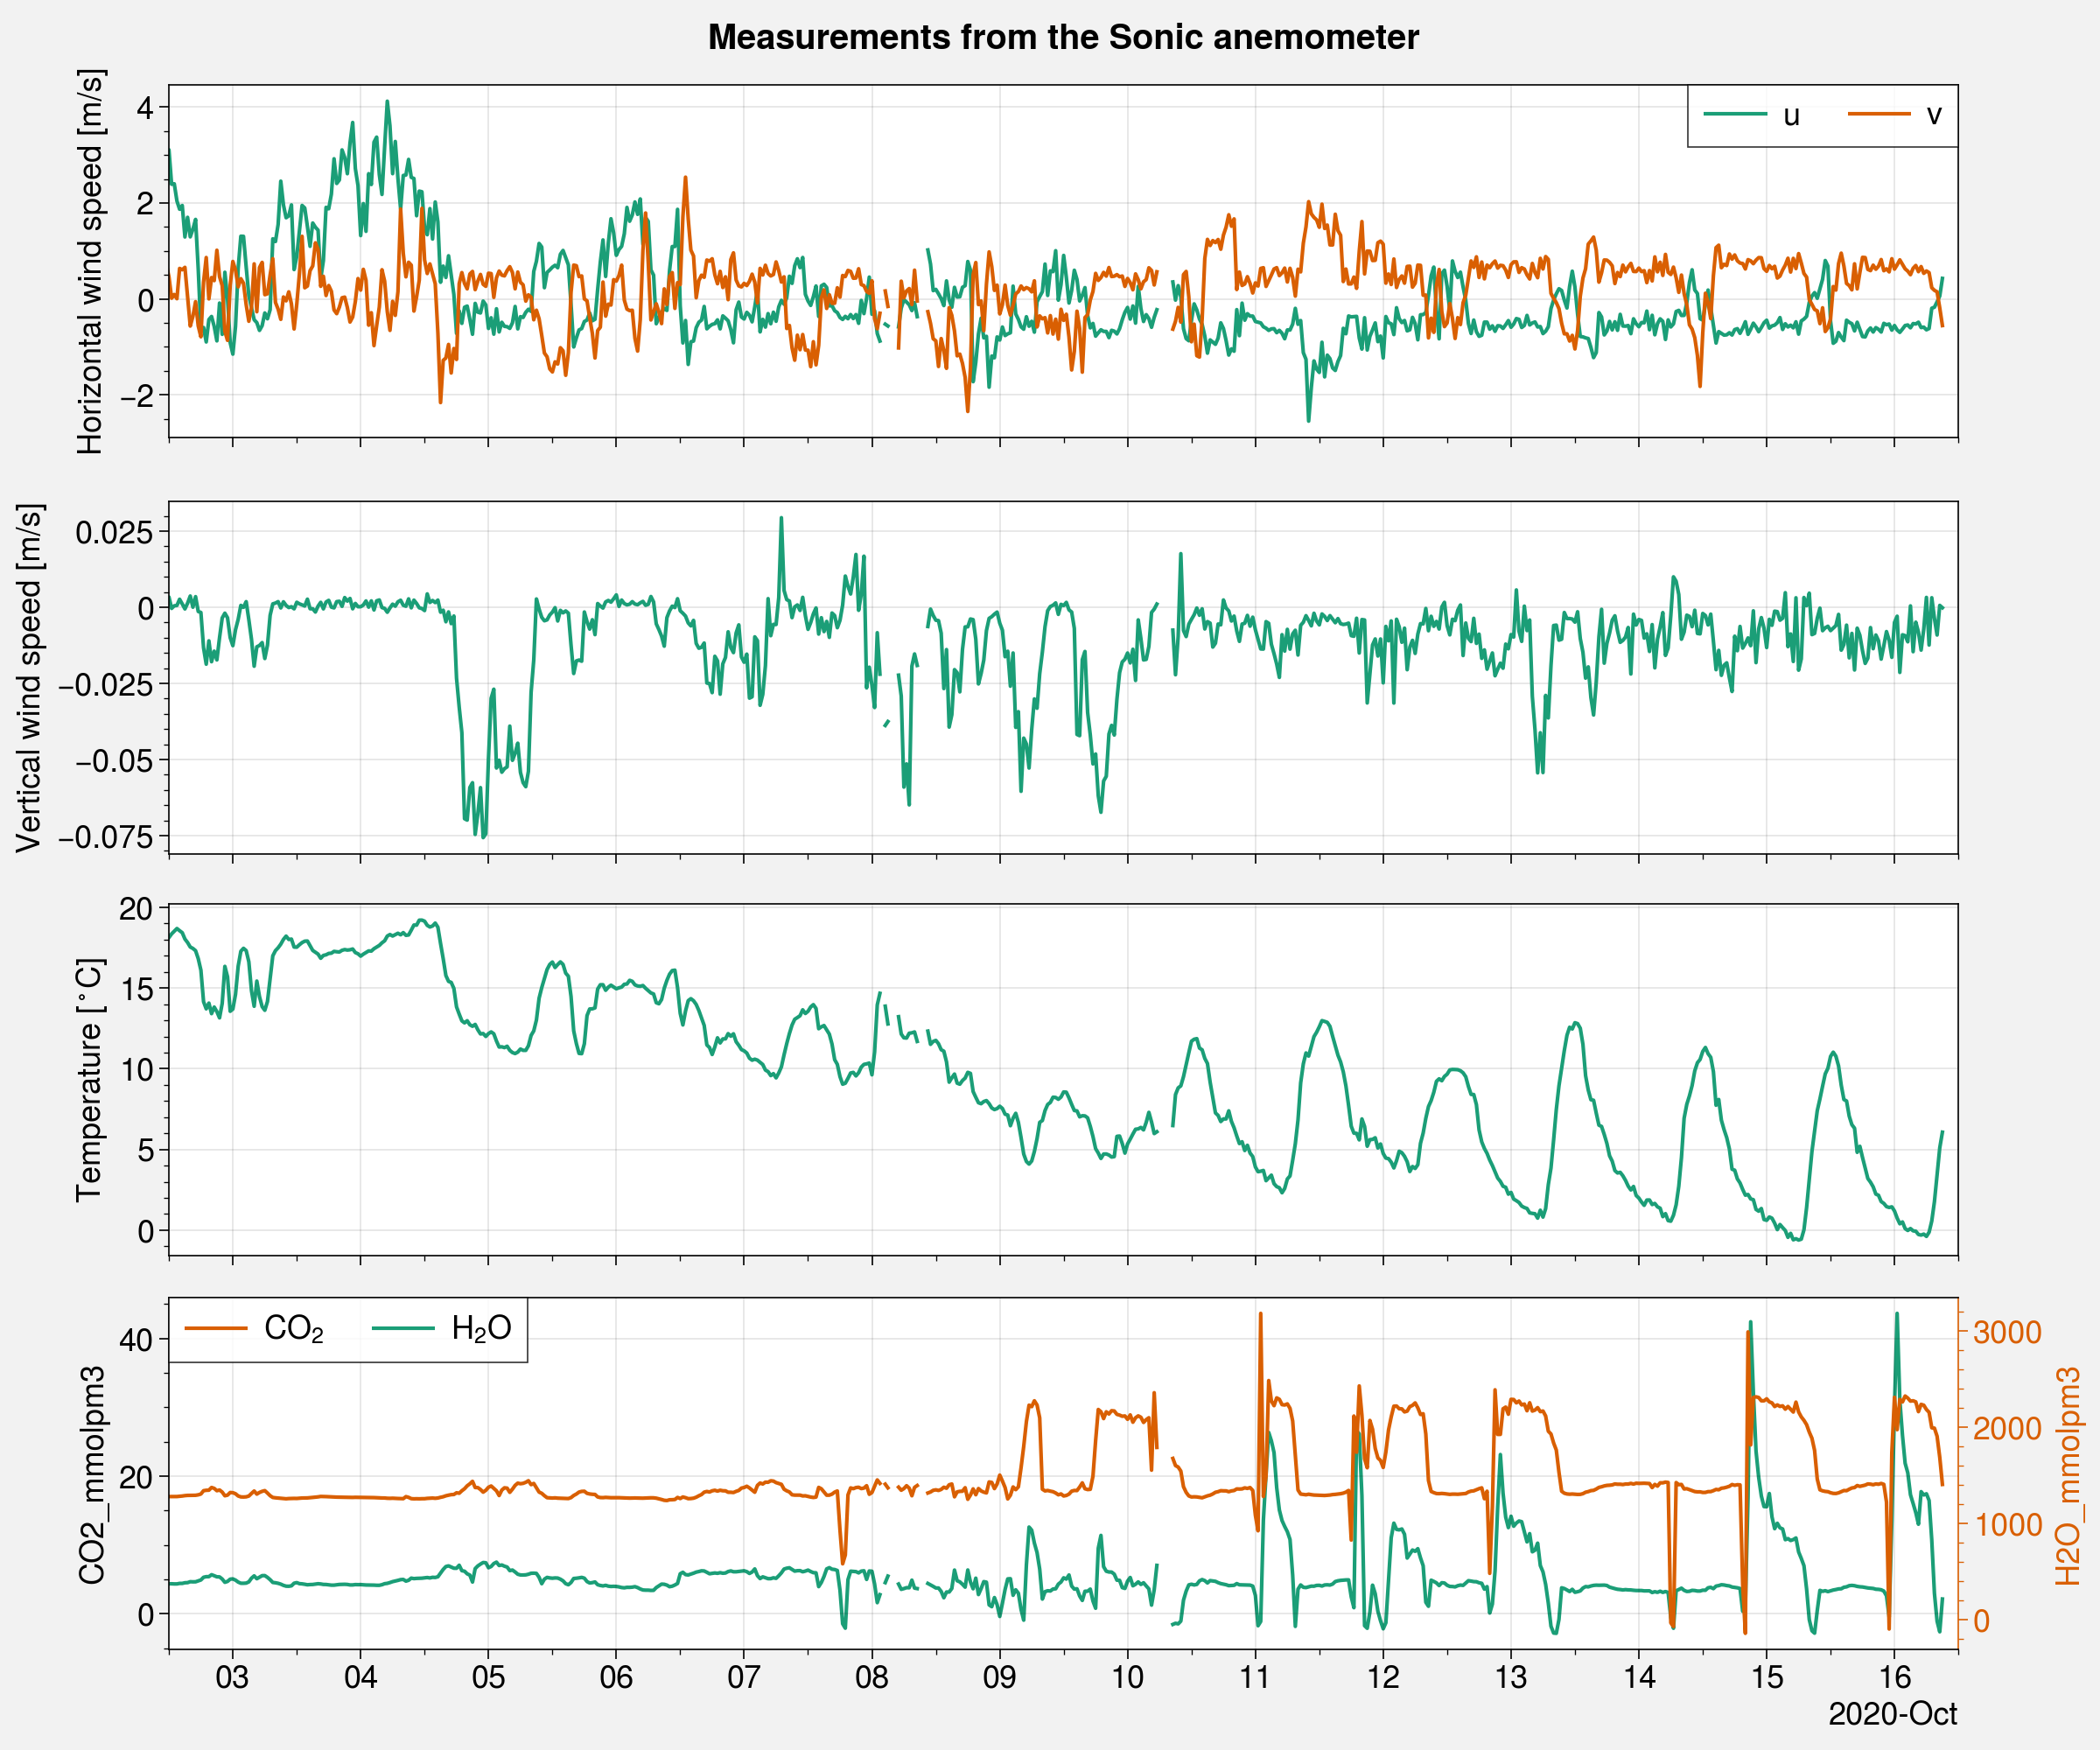

In [44]:
fig,axs = plot.subplots(figsize=(12,10),nrows=4,sharey=False)

ax = axs[0]
ax.plot(FLUX.Ux_1_mps.resample('30T').mean(),label='u')
ax.plot(FLUX.Uy_1_mps.resample('30T').mean(),label='v')
ax.legend()
ax.format(ylabel='Horizontal wind speed [m/s]')

ax = axs[1]
ax.plot(FLUX.Uz_1_mps.resample('30T').mean())
ax.format(ylabel='Vertical wind speed [m/s]')

ax = axs[2]
ax.plot(FLUX.T_sonic_1_deg_C.resample('30T').mean())
ax.format(ylabel=r'Temperature [$^\circ$C]')



ax = axs[3]
ax.plot(FLUX.CO2_mmolpm3.resample('30T').mean(),color='C1',label=r'$CO_2$')
ax.plot(np.nan,np.nan,label=r'$H_2O$')
ax.legend(loc='ul')


axb = ax.twinx()
axb.plot(FLUX.H2O_mmolpm3.resample('30T').mean(),label=r'$H_2O$')
axb.format(color='C1')


axs.format(xrotation=0,xlabel='',xformatter='concise',xlocator='day'
           ,xminorlocator=('hour',range(0,24,12)),xlim=['2020-10-02 12:00','2020-10-16 12:00'])



fig.suptitle('Measurements from the Sonic anemometer')


savefig(fig,'GEOF322','Sonic stuff',['.png'])

# Calculate some flux data

i) The average sensible heat flux 

$\overline{w'\theta'}$ ... but Jochen wants it in $W/m^2$. For this, I need to multiply with $\rho$ and $c_p$, the specific heat capacity of air. 

For $\rho$ = $\frac{p_d}{R_d T} + \frac{p_v}{R_v T}$

Where $p_v$ is the pressure of water vapour

In [37]:
def thermo_es(t):
    #Based on Renfrew and King 2000, modified by Kjersti.
    #Calculates saturation vapour pressure wtr water and ice; returns ice
    #first and then water from the polynomial approximation of Lowe (see Sargent 1980)

    #(ToC) (Temperature in centigrade)

    lowe_coef_ice = np.array([6.109177956, 5.03469897e-1, 1.886013408e-2,\
                     4.176223716e-4, 5.824720280e-6, 4.838803174e-8,\
                     1.838826904e-10])

    lowe_coef_water = np.array([6.107799961, 4.436518521e-1, 1.428945805e-2,\
                       2.650648471e-4,3.031240396e-6, 2.034080948e-8,\
                       6.136820929e-11])

    #Reverse the order of coefficient - does not have to do this in python!
    pesi = lowe_coef_ice[::-1]
    pesw = lowe_coef_water[::-1]


    esi = np.polyval(pesi,t)
    esw = np.polyval(pesw,t)

    #esi is saturation vapour pressure wtr to ice
    #esw is saturation vapour pressure wtr to water

    return esi,esw



def thermo_rh(tk,p,rh):
    #This function generates thermodynamic variables from T[K] p(mb) rh(%)
    #and gives out [theta, thetae, q, qsat, qsati]
    #Based on Renfrew and King 2000, modified by Kjersti 2018.

    #First; want all variables in SI-units
    p = p*100 #Converts from hPa to Pa


    #Calculate the potential temperature from temperature array
    p0 = 1000*100       #reference pressure in Pa
    R = 287             #gas constant
    cp = 1004           #Specific heat for air with respect to pressure
    K = R/cp            #kappa

    a = (p/p0)**(-K) #Constant for calculating the potential temperature
    theta = tk*a

    #calculate the equivalent potential temperature
 #   Lv = 2.5e6    #latent heat of vaporization
    eps = 0.622   #epsilon = Rd/Rv
 #   es0 = 0.611e3 #reference saturation vapour pressure Pa
 #   tk0 = 273.15  #reference temperature
    t = tk - 273.15
    #Function that calculates saturation vapour pressure wrt water and ice
    esi,es = thermo_es(t)

    es = es*100                #Convert to Pa
    esi = esi*100              #Convert to Pa
    rsat = eps*es/(p-es)       #Saturation mixing ratio wtr water

    rsati = eps*esi/(p-esi)    #saturation mixing ratio wtr ice

    e = es*rh / 100            #vapour pressure (Pa)

#    qsat = rsat/(rsat+1)       #sat specific humidity wrt water
#    qsati = rsati/(rsati+1) 	#sat specific humidity wrt ice


    #Calculate the water vapour mixing ratio, r; and specific humidity, q;
    r = eps*e/(p-e)
    q = r/(r+1)

    #Change the units to be g/kg
    Tlcl = 2840/(3.5*np.log(tk)-np.log(e/100)-4.805) + 55  # eqn 21, Bolton
    thetae = theta*np.exp(((3.376/Tlcl)-0.00254)\
                        *r*(1+0.81*r*1e-3)) # eqn 38, Bolton


    return thetae, q, r, rsat, rsati,e


def rho(tk,p,rh): 
    Rd = 287.05
    Rv = 461.4964
    
    __,__,__,__,__,pv = thermo_rh(tk,p,rh)
    pd = p - pv
    
    rho = pd/(Rd*tk) + pv/(Rv*tk)
    return rho

In [38]:
from scipy.signal import butter

import scipy.signal as signal

In [39]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a 

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def calc_turb(df): 
    prime = butter_highpass_filter(df.interpolate(), 1/(30*60), 1/20, 5) 
    prime_df = pd.Series(prime,index=df.index)
    
    return prime_df

Because tehre is a trend in the time series, for instance at 2020-10-15 at 15 pm, if we use the 30 minutes rolling mean, the turbulent fluxes are not accurate. We therefore use a high pass filter instead, the butter filter. 

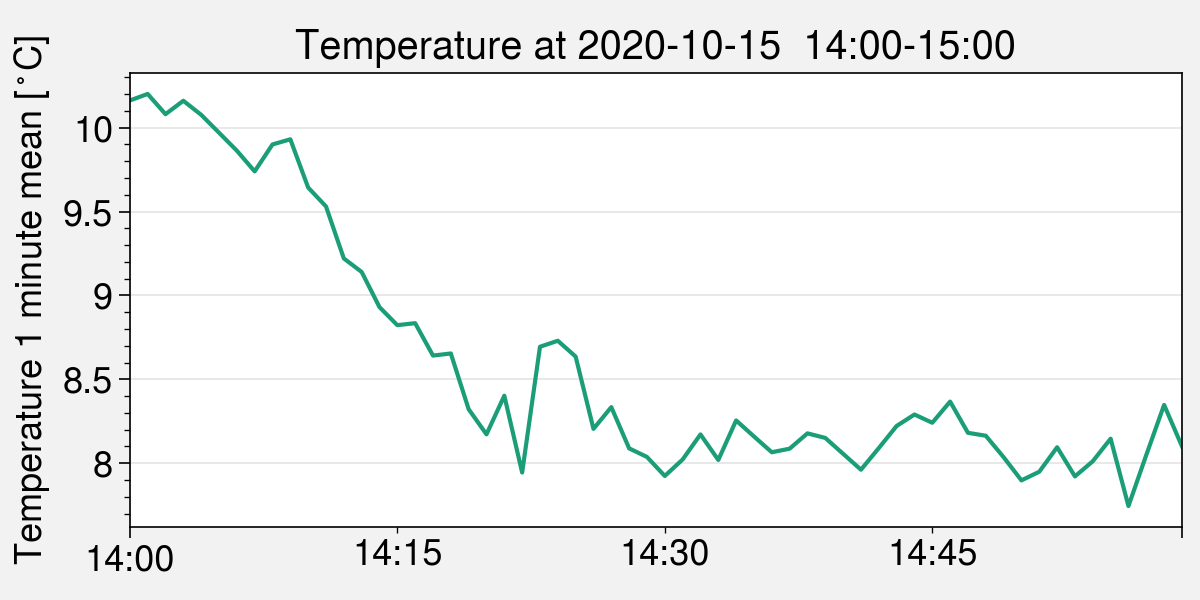

In [40]:
fig,ax = plot.subplots(figsize=(6,3))
FLUX.T_sonic_1_deg_C['2020-10-15 14'].interpolate().resample('1T').mean().plot(ax=ax)
ax.format(title='Temperature at 2020-10-15  14:00-15:00',ylabel=r'Temperature 1 minute mean [$^\circ$C]',xrotation=0,
         xlabel='')

Calculate turbulent fluctiations: using  a high pass  filter

In [41]:
T_prime = calc_turb(FLUX.T_sonic_1_deg_C)
w_prime = calc_turb(FLUX.Uz_1_mps)
u_prime = calc_turb(FLUX.Ux_1_mps)
v_prime = calc_turb(FLUX.Uy_1_mps)

Text(0.5, 0.98, "Distribution of T' and W'")

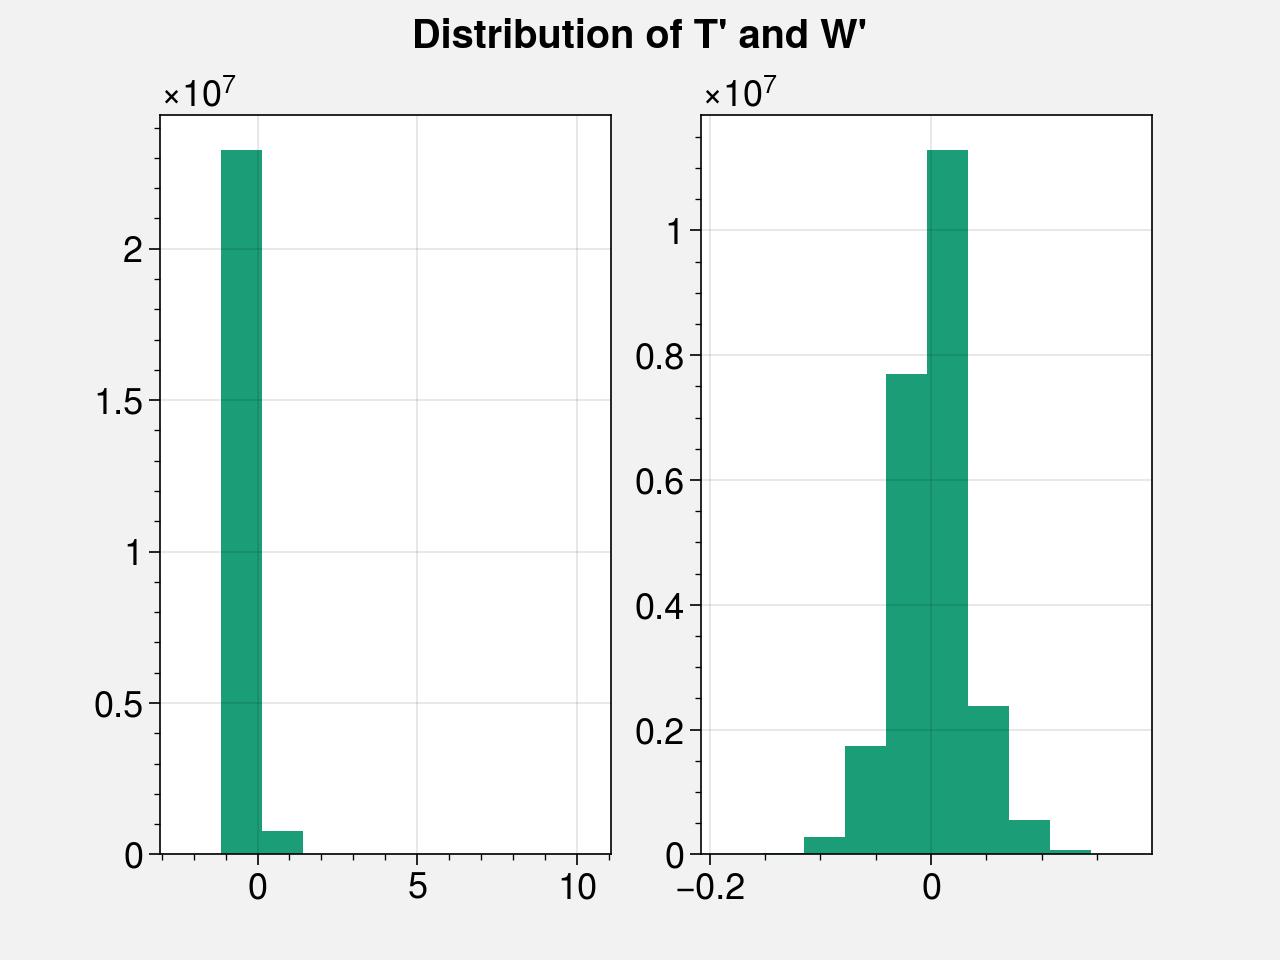

In [42]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2)
ax[0].hist(T_prime)
ax[1].hist(w_prime)
fig.suptitle(r"Distribution of T' and W'")

Calculate the sensible heat flux

In [45]:
sens_hflux = w_prime*T_prime

To get it in W/m², we need to multiply it with the density and the specific heat capacity of air, $c_p = 1004$. . We calculate $\rho$ from the Weather station data, because that seems the easiest. This is only available at 1 minute resolution, so we resample the fluxes to 1 minutes mean. Furthermore, we have a measuring frequency at 20Hz, and because we want it in W/m² = J/s/m², we multiply it with 20. 

In [46]:
rho_AWS = rho(AWS.TA+273.15,AWS.P*1e2,AWS.UU)

In [47]:
cp = 1004
sens_hflux_wm2 = sens_hflux.resample('1T').mean()*rho_AWS*cp*20

In [48]:
sens_hflux_wm2.mean()

-4.5373497703393

## Latent heat flux

In [49]:
__,spec_hum_AWS,__,__,__,__ = thermo_rh(AWS.TA+273.15,AWS.P*1e2,AWS.UU)

In [50]:
#this routine is from last year... not sure where it comes from.. but results are reasonable
q_FLUX = FLUX.H2O_mmolpm3*18.02*0.001/(FLUX.H2O_mmolpm3*18.02*1e-3+FLUX.Pressure_kPa*10*28.97/FLUX.T_sonic_1_deg_C*8.3144598)    #specific humidity, [g/kg] i think XD XD XD

In [51]:
q_FLUX = q_FLUX.where(q_FLUX<3*q_FLUX.std()).where(q_FLUX>0)

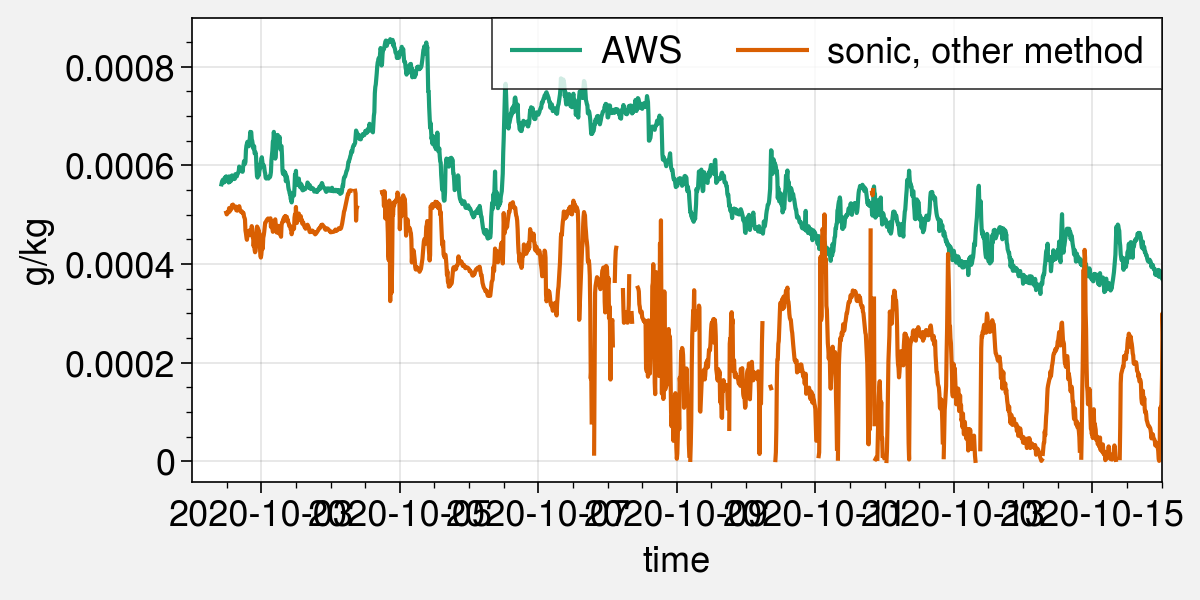

In [52]:
fig,ax = plot.subplots(figsize=(6,3))


ax.plot(spec_hum_AWS.resample('10T').mean()*1e1,label='AWS')
ax.plot(q_FLUX.resample('10T').mean(),label='sonic, other method')
ax.format(xlim=['2020-10-02','2020-10-16'],xrotation=0,ylabel='g/kg')

ax.legend()

It is perhaps not a perfect fit, btu it shows the same overall trend toward lower specific humidity at the end of the period

### Latent heat flux = $\overline{w'q'}L_v\rho$

In [53]:
q_prime = calc_turb(q_FLUX.interpolate().dropna())
latent_hflux = (w_prime*q_prime).resample('1T').mean()*2.5e6*rho_AWS.resample('1T').mean()*20
sens_hflux_wm2 = sens_hflux_wm2.where(sens_hflux_wm2.abs()<3*sens_hflux_wm2.std())

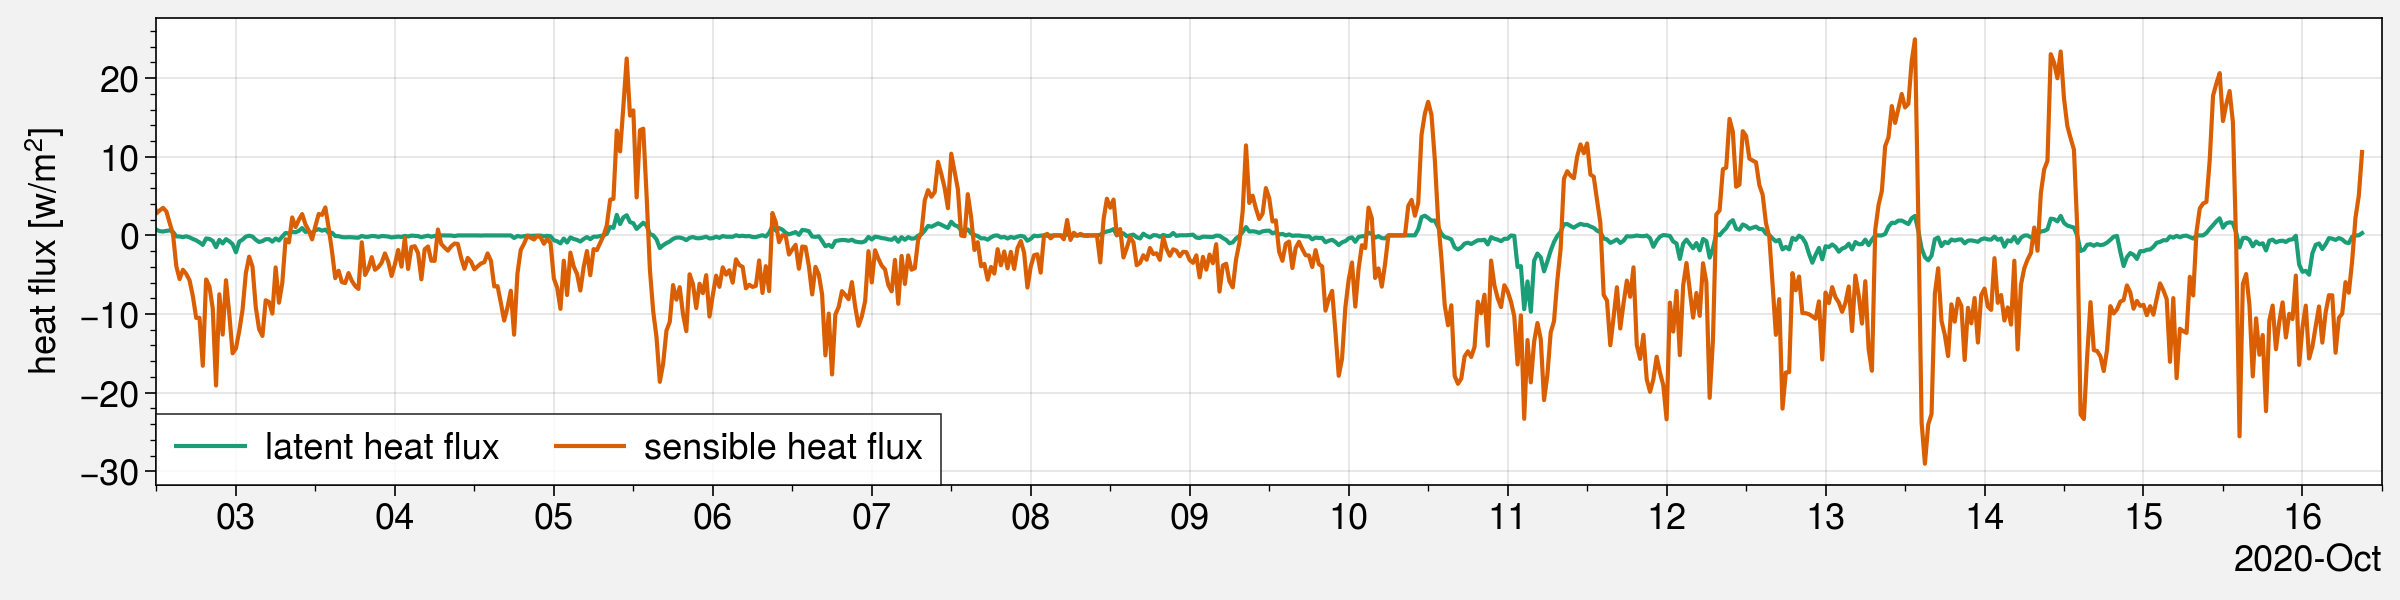

In [57]:
fig,ax = plot.subplots(figsize=(12,3))
ax.plot(latent_hflux.resample('30T').mean(),label = 'latent heat flux')
ax.plot(sens_hflux_wm2.resample('30T').mean(),color='C1',label='sensible heat flux')
ax.format(xrotation=0,ylabel=r'heat flux $[w/m^2]$',xlabel='',xformatter='concise',xlocator='day'
           ,xminorlocator=('hour',range(0,24,12)),xlim=['2020-10-02 12:00','2020-10-16 12:00'])
ax.legend()


savefig(fig,'GEOF322','fluxes',['.png'])

## Friction velocity

In [60]:
ustar = ((u_prime*w_prime).resample('30T').mean()**2 + (v_prime*w_prime).resample('30T').mean()**2)**(1/4)

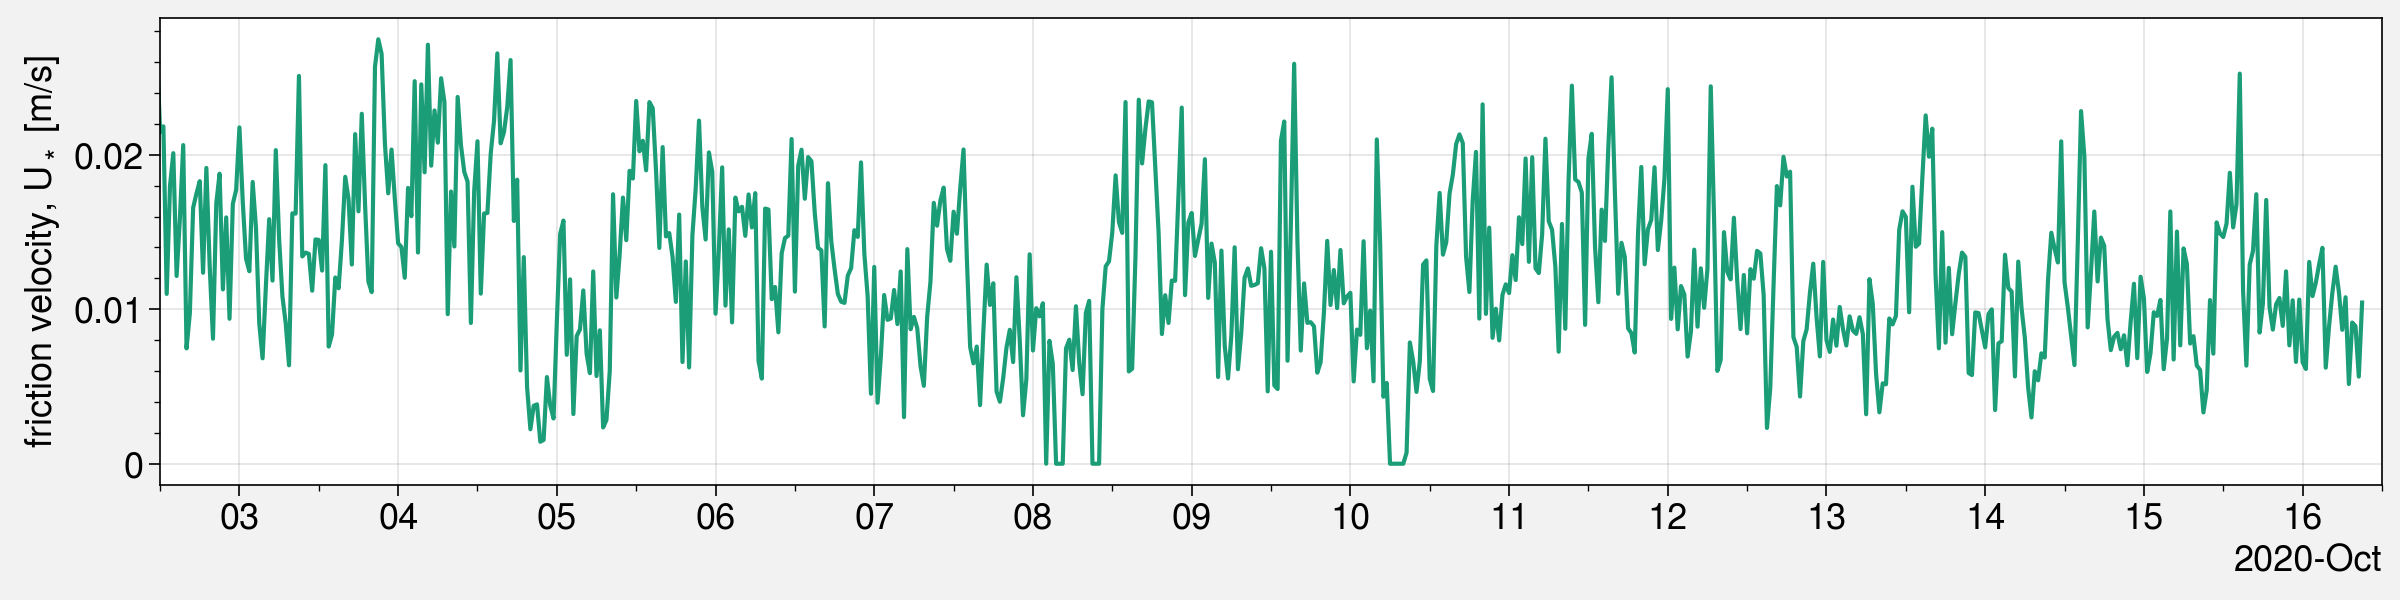

In [69]:
fig,ax = plot.subplots(figsize=(12,3))

ax.plot(ustar.resample('30T').mean())
ax.format(xrotation=0,ylabel=r'friction velocity, $U_\ast$ [m/s]',xlabel='',xformatter='concise',xlocator='day'
           ,xminorlocator=('hour',range(0,24,12)),xlim=['2020-10-02 12:00','2020-10-16 12:00'])


savefig(fig,'GEOF322','ustar',['.png'])

In [70]:
ustar.describe()

count    6.680000e+02
mean     1.244028e-02
std      5.559168e-03
min      2.187759e-13
25%      8.449882e-03
50%      1.208562e-02
75%      1.614311e-02
max      2.747078e-02
dtype: float64

## Obukhov length

$ L = \frac{-\overline{\theta_v} u_*^3}{k g (w'\theta_v')_s}$

k = von Karman's constant  = 0.4
... so then first, I have to calculate the virtual temperature

In [71]:
theta = (FLUX.T_sonic_1_deg_C+273.15)*(100/FLUX.Pressure_kPa)**0.286
theta_v = theta * (1+0.61*q_FLUX.where(q_FLUX<q_FLUX.max()))

theta_v_prime = calc_turb(theta_v.interpolate().dropna())

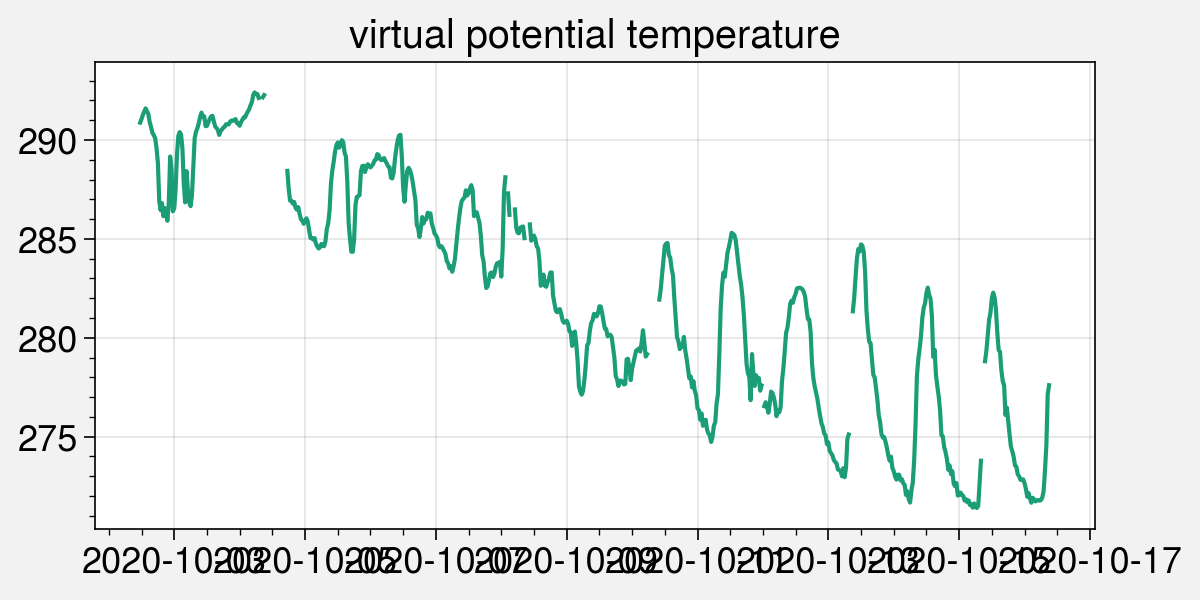

In [72]:
fig,ax = plot.subplots(figsize=(6,3))
ax.plot(theta_v.resample('30T').mean())
ax.format(xrotation=0,title='virtual potential temperature')

In [73]:
theta_v_flux = w_prime*theta_v_prime

In [74]:
ustar

time
2020-10-02 11:30:00    0.027173
2020-10-02 12:00:00    0.021470
2020-10-02 12:30:00    0.021836
2020-10-02 13:00:00    0.010990
2020-10-02 13:30:00    0.017988
                         ...   
2020-10-16 07:00:00    0.005158
2020-10-16 07:30:00    0.009139
2020-10-16 08:00:00    0.008904
2020-10-16 08:30:00    0.005638
2020-10-16 09:00:00    0.010431
Freq: 30T, Length: 668, dtype: float64

In [75]:
L = - (theta_v.resample('30T').mean()*(ustar.resample('30T').mean())**3)/(0.4*9.81*theta_v_flux.resample('30T').mean())

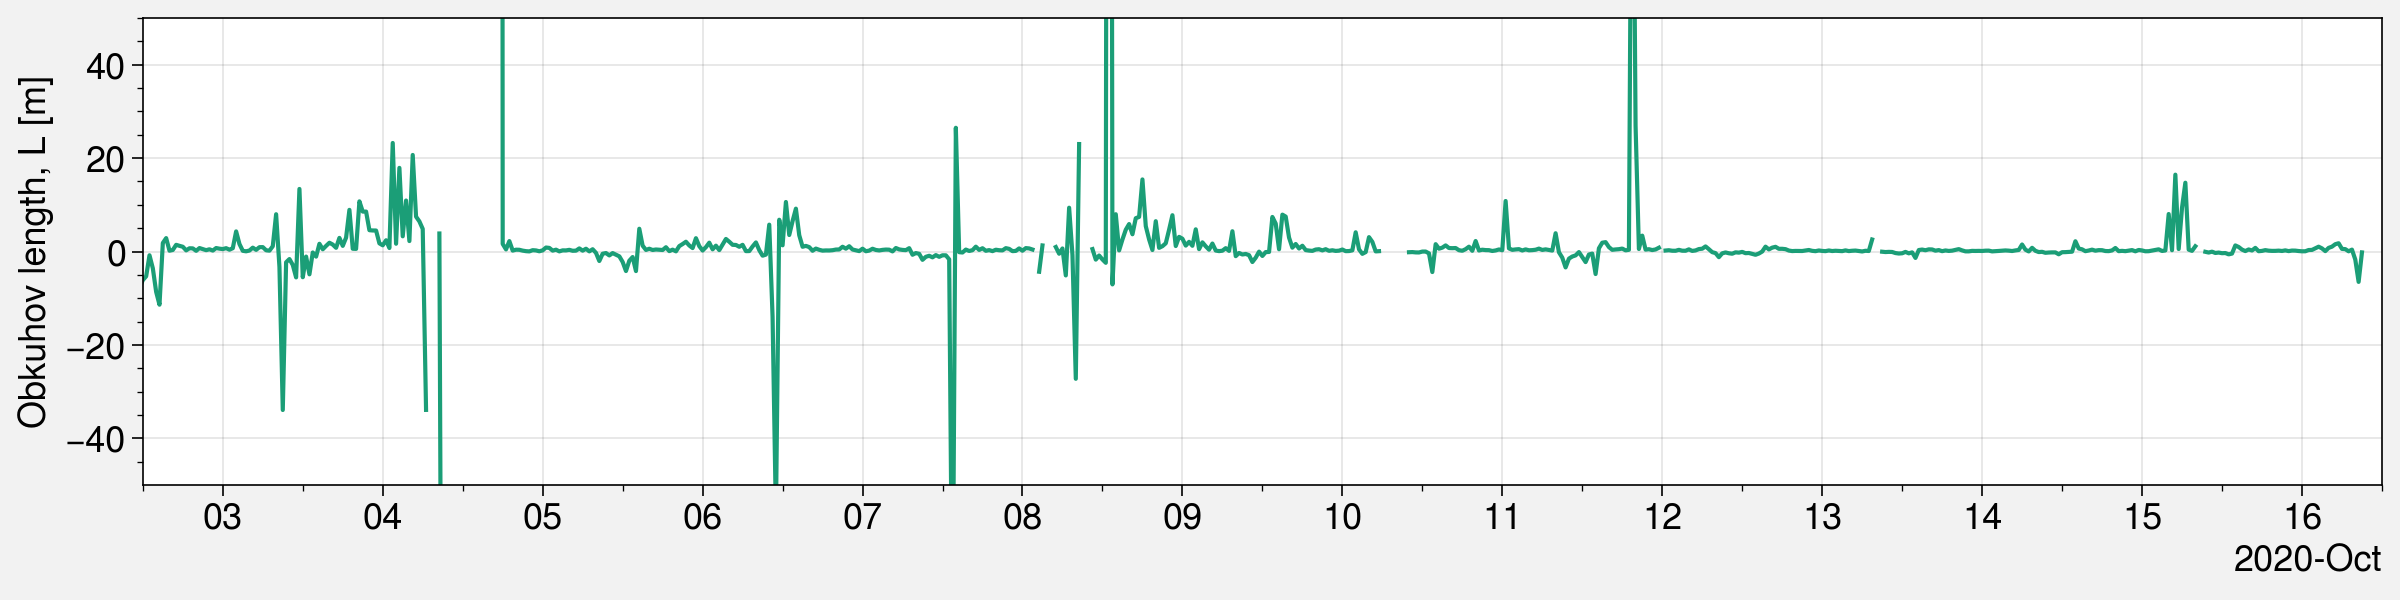

In [87]:
fig,ax = plot.subplots(figsize=(12,3))

ax.plot(L.where(L.abs()<3*L.std()).resample('30T').mean())
ax.format(ylabel='Obkuhov length, L [m]')

ax.format(xrotation=0,xlabel='',xformatter='concise',xlocator='day',ylim=[-50,50]
           ,xminorlocator=('hour',range(0,24,12)),xlim=['2020-10-02 12:00','2020-10-16 12:00'])


savefig(fig,'GEOF322','obukhov_length',['.png'])

In [90]:
L.where(L.abs()<3*L.std()).resample('30T').mean().describe()

count      631.000000
mean        44.060686
std       1033.020314
min       -166.505827
25%          0.042251
50%          0.281883
75%          0.788147
max      25922.040192
dtype: float64

Stability parameter: 


$\xi = z/L$.... where z is the height of the measurements

sonic is located at z = 2.20m


In [91]:
xi = 2.20/L

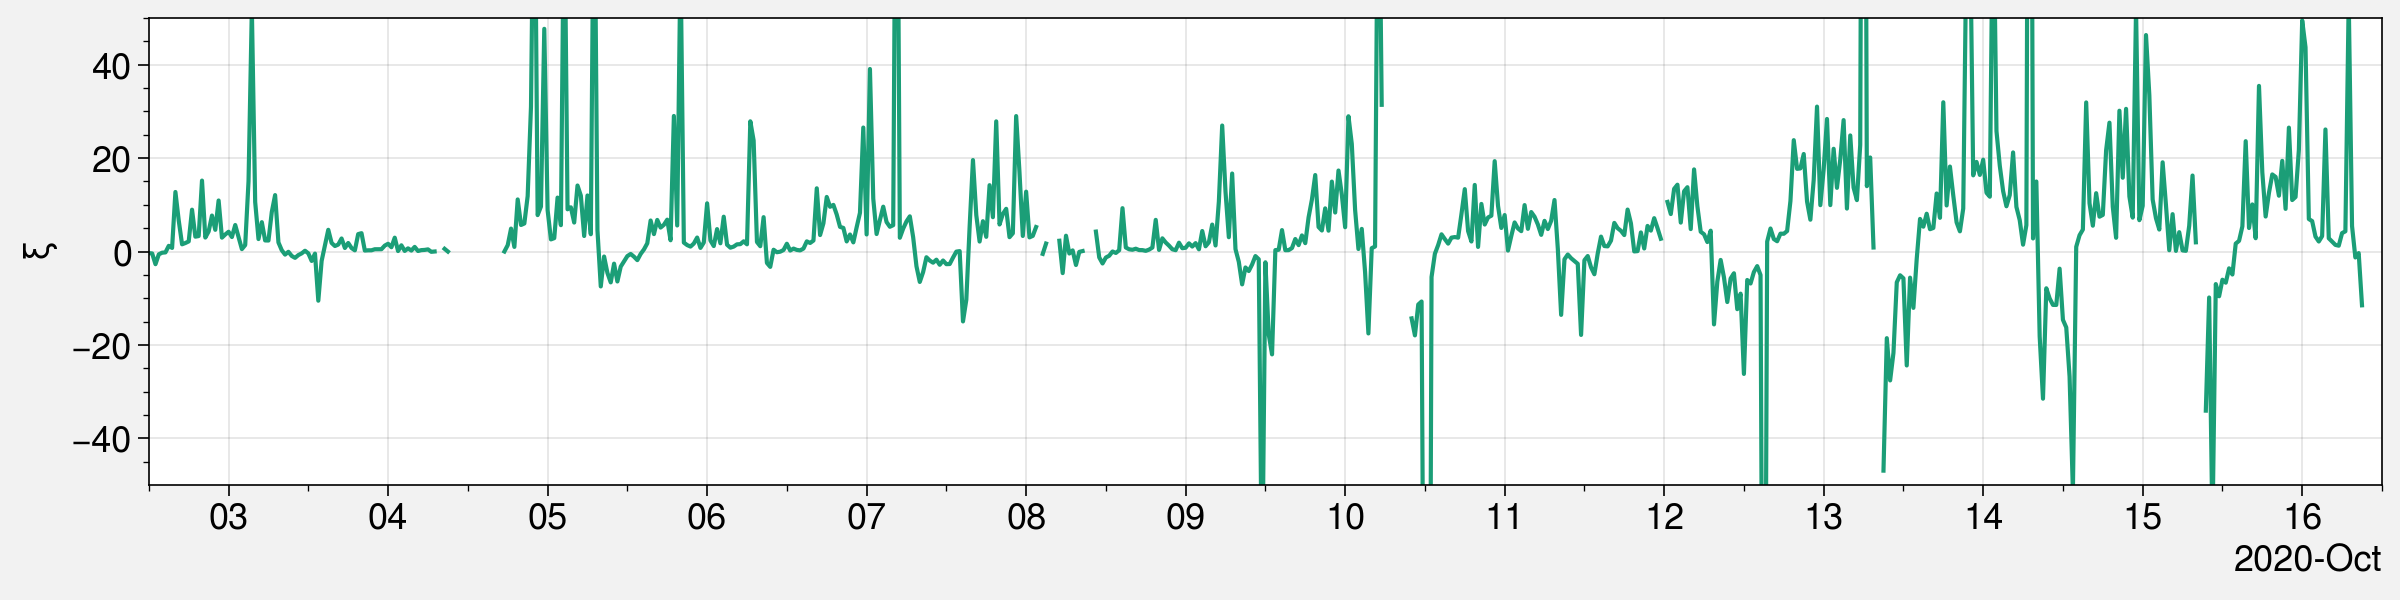

In [218]:
fig,ax = plot.subplots(figsize=(12,3))

ax.plot(xi[xi.abs()<1e5].resample('30T').mean(),linestyle='-')
ax.fill_between(xi,interpolate=True)


ax.format(ylabel=r'$\xi$',xrotation=0)
ax.format(xrotation=0,xlabel='',xformatter='concise',xlocator='day',ylim=[-50,50]
           ,xminorlocator=('hour',range(0,24,12)),xlim=['2020-10-02 12:00','2020-10-16 12:00'])


savefig(fig,'GEOF322','stability_parameter',['.png'])

## The average turbulent kinetic energy

In [117]:
TKE = 0.5 * ((u_prime**2).resample('30T').mean() +(v_prime**2).resample('30T').mean() + (w_prime**2).resample('30T').mean())

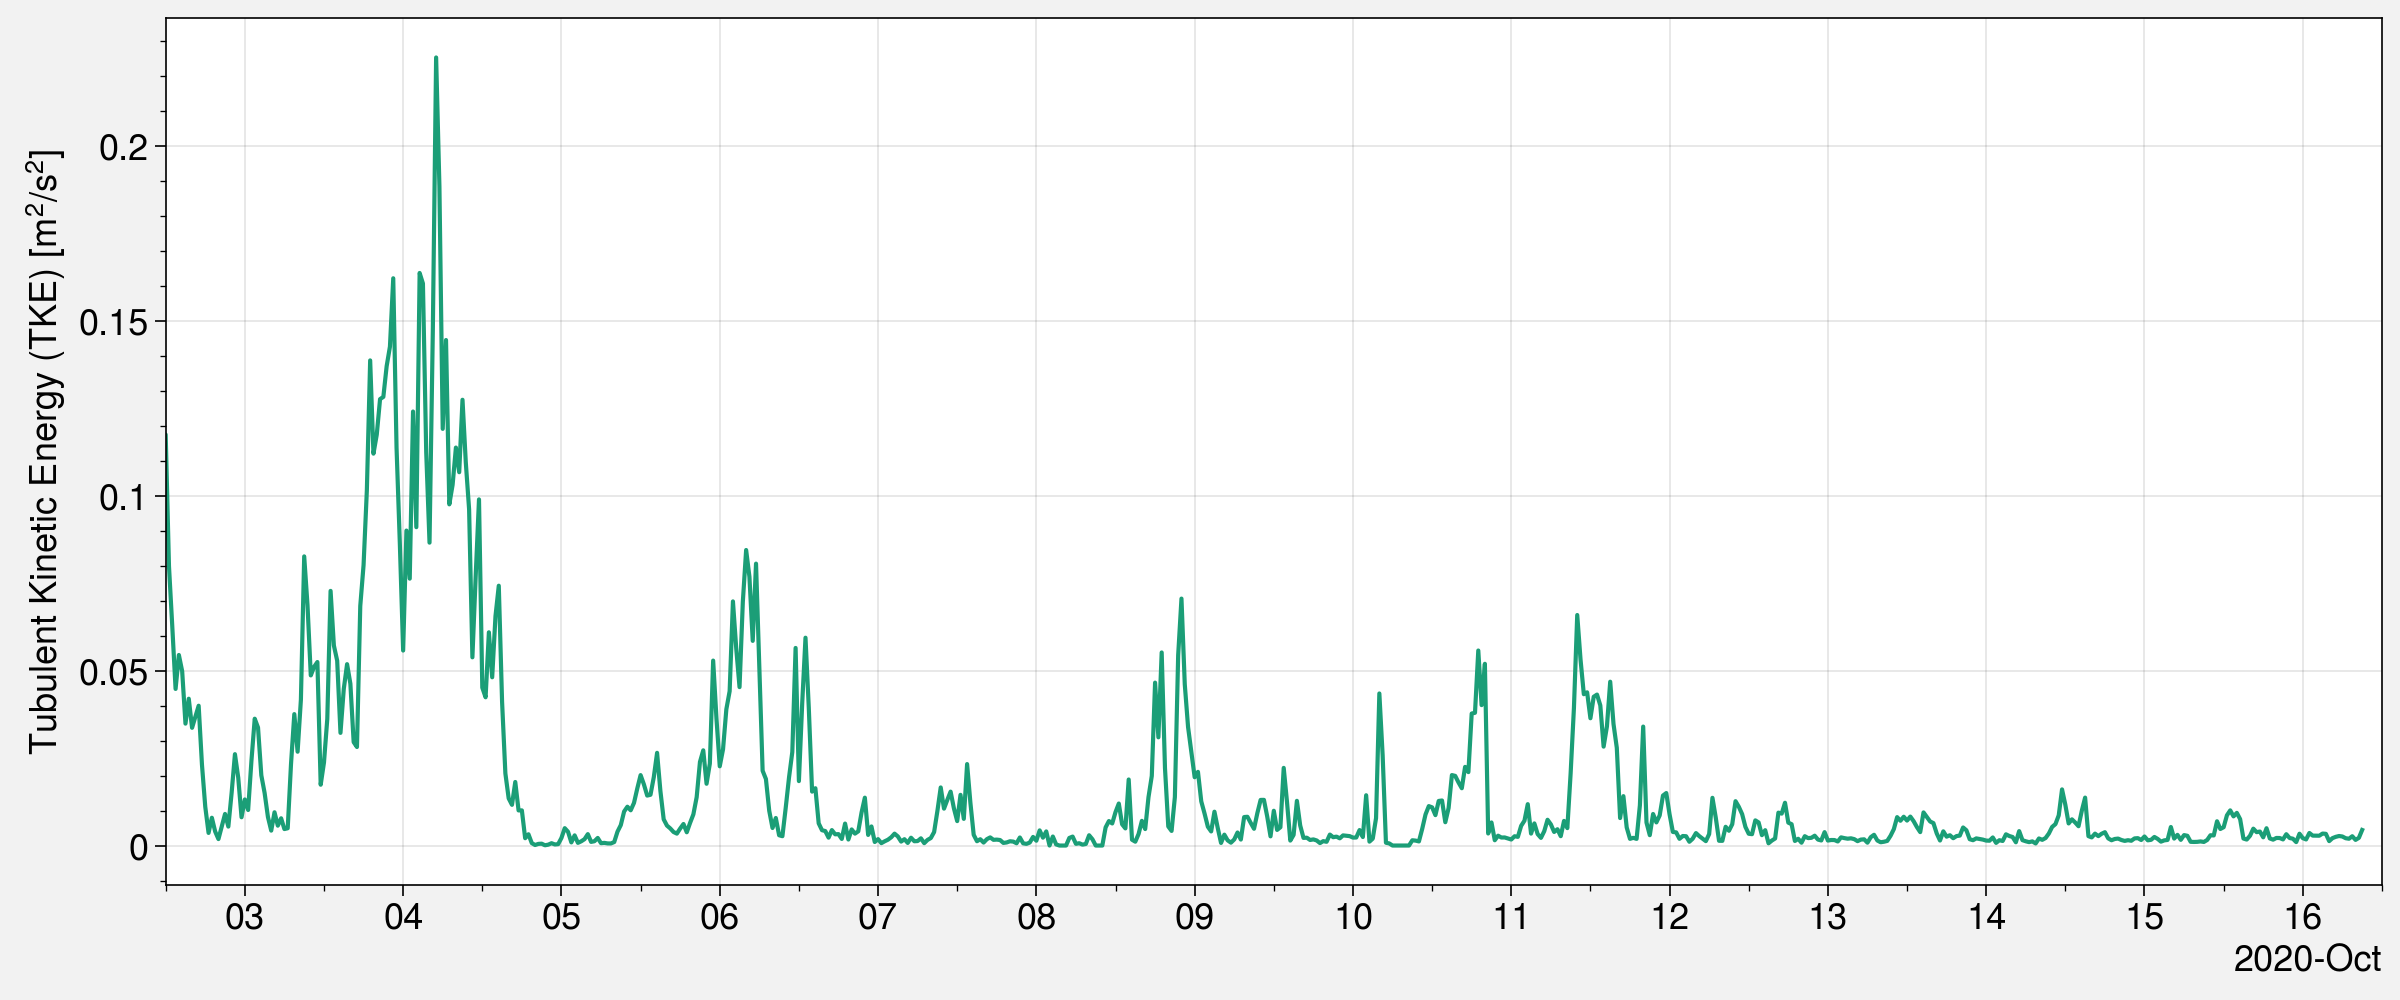

In [127]:
fig,ax= plot.subplots(figsize=(12,5))

ax.plot(TKE)
ax.format(ylabel=r'Tubulent Kinetic Energy (TKE) $[m^2/s^2]$')
ax.format(xrotation=0,xlabel='',xformatter='concise',xlocator='day'
           ,xminorlocator=('hour',range(0,24,12)),xlim=['2020-10-02 12:00','2020-10-16 12:00'])



savefig(fig,'GEOF322','tke',['.png'])

# The bowen ratio

- ratio of sensible heat flux to latent heat flux

In [128]:
Bowen = sens_hflux_wm2.resample('30T').mean()/latent_hflux.resample('30T').mean()

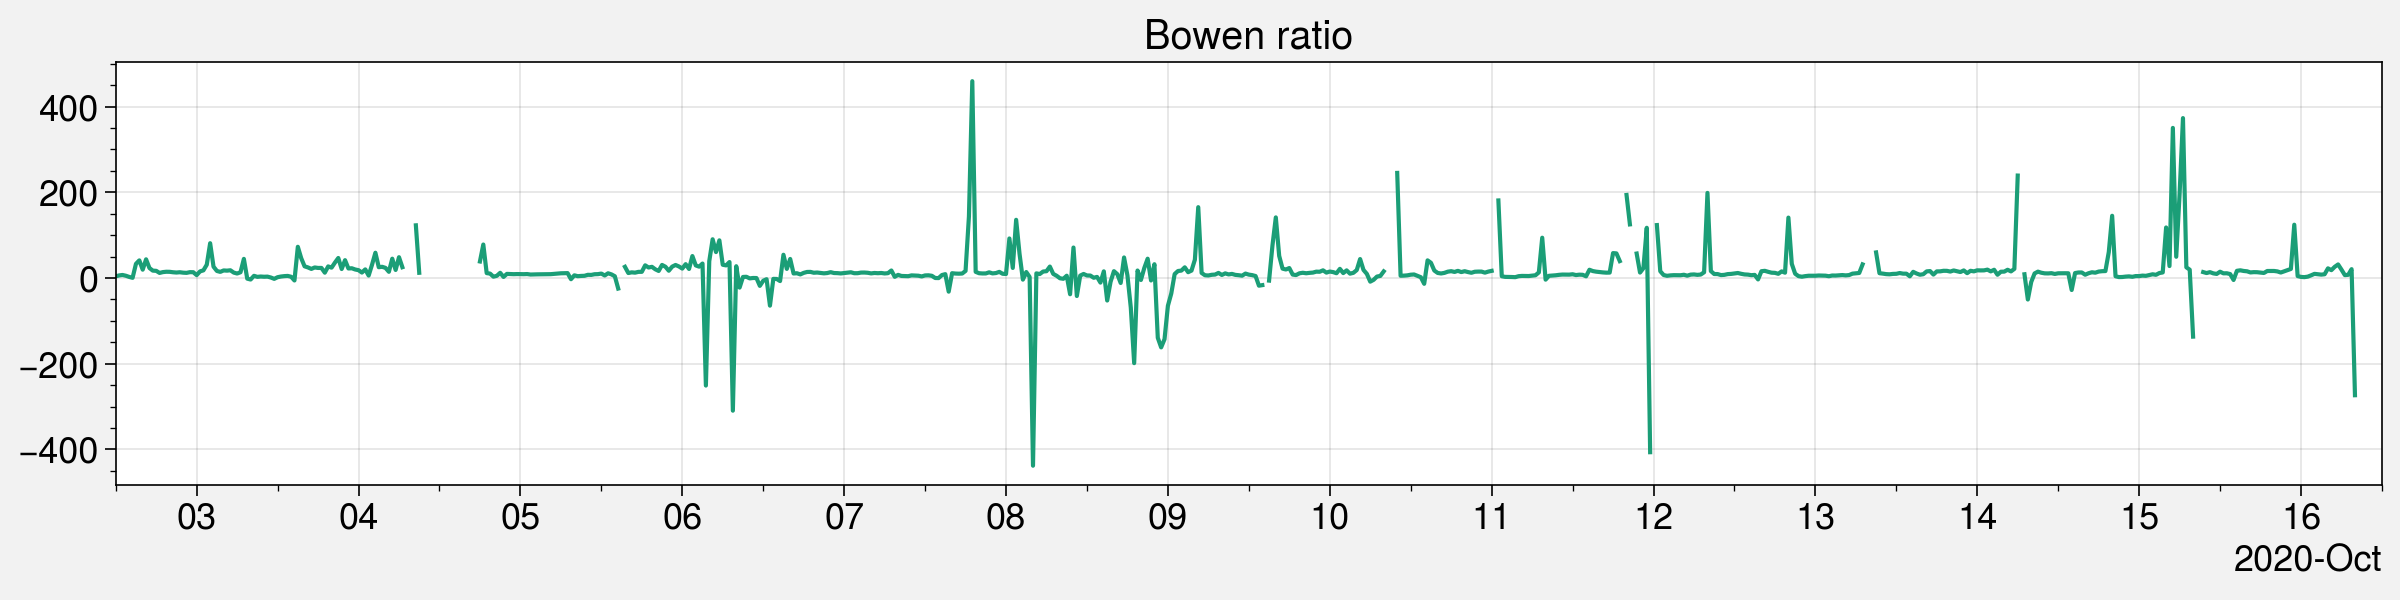

In [130]:
fig,ax = plot.subplots(figsize=(12,3))
ax.plot(Bowen.where(Bowen.abs()<500))
ax.format(xlabel='',xrotation=0,title='Bowen ratio')
ax.format(xrotation=0,xlabel='',xformatter='concise',xlocator='day'
           ,xminorlocator=('hour',range(0,24,12)),xlim=['2020-10-02 12:00','2020-10-16 12:00'])

savefig(fig,'GEOF322','bowenRatio',['.png'])

## Plot some nice things for the surface energy balance

## select only the days with perfect weather


In [138]:
KZ_rad_cloud = (pd.read_csv('TOA5_2068.Ett_min.dat',header=1).iloc[2:].drop('RECORD',axis=1).assign(time = lambda X : pd.to_datetime(X['TIMESTAMP'])).set_index('time')
            .drop('TIMESTAMP',axis=1)
            .apply(lambda x:x.astype(float))).resample('30T').mean().query('index.dt.day<11 and index.dt.month==10 and index.dt.day != 12')

KZ_rad_comp_cloud = KZ_rad_cloud.assign(hour = lambda t : t.index.time).groupby('hour').mean()

def create_comp(df,VAR):
    cloud = pd.DataFrame(df,columns=[VAR]).query('index.dt.day<11 and index.dt.month==10 and index.dt.day != 12').resample('30T').mean().assign(hour = lambda t : t.index.time).groupby('hour').mean()
    clear = pd.DataFrame(df,columns=[VAR]).query('index.dt.day>11 and index.dt.month==10 and index.dt.day != 12').resample('30T').mean().assign(hour = lambda t : t.index.time).groupby('hour').mean()

    return cloud,clear
KZ_rad_clear = (pd.read_csv('TOA5_2068.Ett_min.dat',header=1).iloc[2:].drop('RECORD',axis=1).assign(time = lambda X : pd.to_datetime(X['TIMESTAMP'])).set_index('time')
            .drop('TIMESTAMP',axis=1)
            .apply(lambda x:x.astype(float))).resample('30T').mean().query('index.dt.day>11 and index.dt.month==10 and index.dt.day != 12')
KZ_rad_comp_clear = KZ_rad_clear.assign(hour = lambda t : t.index.time).groupby('hour').mean()

hsf_cloud,hsf_clear = create_comp(sens_hflux_wm2,'hsf')
lhf_cloud,lhf_clear = create_comp(latent_hflux,'lhf')

In [201]:
tke_cloud,tke_clear = create_comp(TKE,'TKE')
xi_cloud,xi_clear   = create_comp(xi.where(xi.abs()<3*xi.std()),'xi')
ustar_cloud,ustar_clear   = create_comp(ustar.resample('30T').mean(),'ustar')
w_cloud,w_clear = create_comp(w_prime.resample('30T').mean(),'w')

In [133]:
import datetime

my_day = datetime.date(2014, 7, 15)

x_dt = [ datetime.datetime.combine(my_day, t) for t in KZ_rad_comp_clear.index]


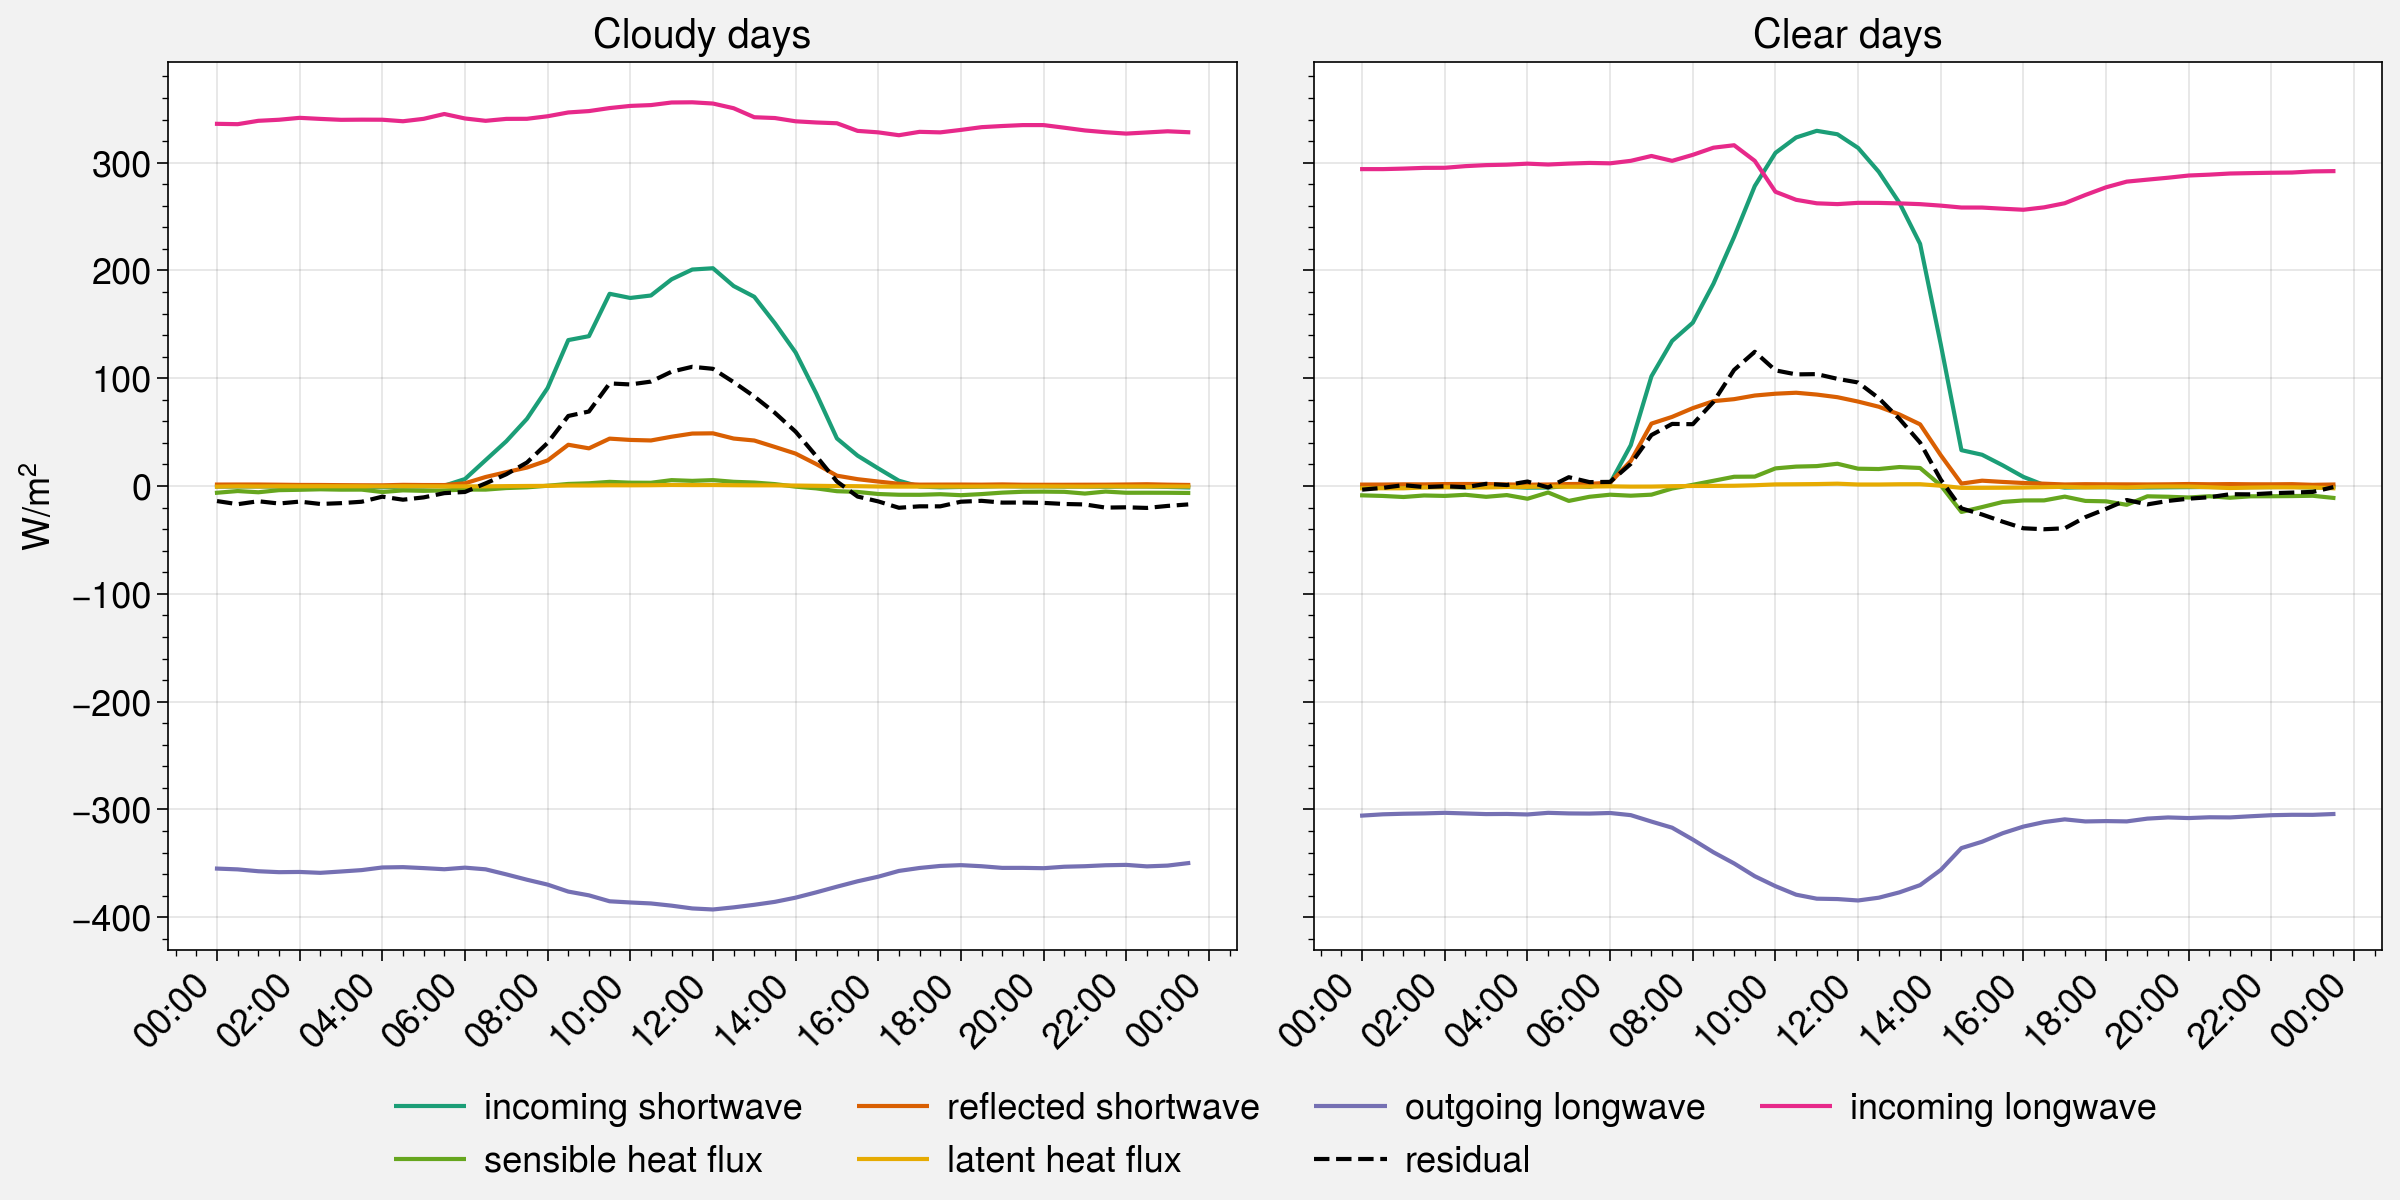

In [139]:
fig,ax = plot.subplots(ncols=2,figsize=(12,6))


ax[0].plot(x_dt,KZ_rad_comp_cloud.KO_Wpm2_Avg.values,label='incoming shortwave')
ax[0].plot(x_dt,KZ_rad_comp_cloud.KN_Wpm2_Avg.values,label='reflected shortwave')
ax[0].plot(x_dt,-KZ_rad_comp_cloud.LNK_Wpm2_Avg.values,label='outgoing longwave')
ax[0].plot(x_dt,KZ_rad_comp_cloud.LOK_Wpm2_Avg.values,label='incoming longwave')
ax[0].plot(x_dt,hsf_cloud.values,label='sensible heat flux')
ax[0].plot(x_dt,lhf_cloud.values,label='latent heat flux')
ax[0].plot(x_dt,(KZ_rad_comp_cloud.KO_Wpm2_Avg-KZ_rad_comp_cloud.KN_Wpm2_Avg+KZ_rad_comp_cloud.LOK_Wpm2_Avg-KZ_rad_comp_cloud.LNK_Wpm2_Avg).values-lhf_cloud.values.squeeze()-hsf_cloud.values.squeeze(),label='residual',color='k',linestyle='--')
ax[0].format(title='Cloudy days')

ax[1].plot(x_dt,KZ_rad_comp_clear.KO_Wpm2_Avg.values)
ax[1].plot(x_dt,KZ_rad_comp_clear.KN_Wpm2_Avg.values)
ax[1].plot(x_dt,-KZ_rad_comp_clear.LNK_Wpm2_Avg.values)
ax[1].plot(x_dt,KZ_rad_comp_clear.LOK_Wpm2_Avg.values)
ax[1].plot(x_dt,hsf_clear.values)
ax[1].plot(x_dt,lhf_clear.values)
ax[1].plot(x_dt,(KZ_rad_comp_clear.KO_Wpm2_Avg-KZ_rad_comp_clear.KN_Wpm2_Avg+KZ_rad_comp_clear.LOK_Wpm2_Avg-KZ_rad_comp_clear.LNK_Wpm2_Avg).values-lhf_clear.values.squeeze()-hsf_clear.values.squeeze(),color='k',linestyle='--')
ax[1].format(title='Clear days')

ax.format(ylabel=r'$W/m^2$',
    xlocator=('hour', range(0, 24, 2)), xminorlocator=('minute', range(0, 60, 30)),
    xformatter='%H:%M', xrotation=45)


fig.legend(loc='bottom',ncols=4,frame=False)


savefig(fig,'GEOF322','surface_energy_balance_composite',['.png'])

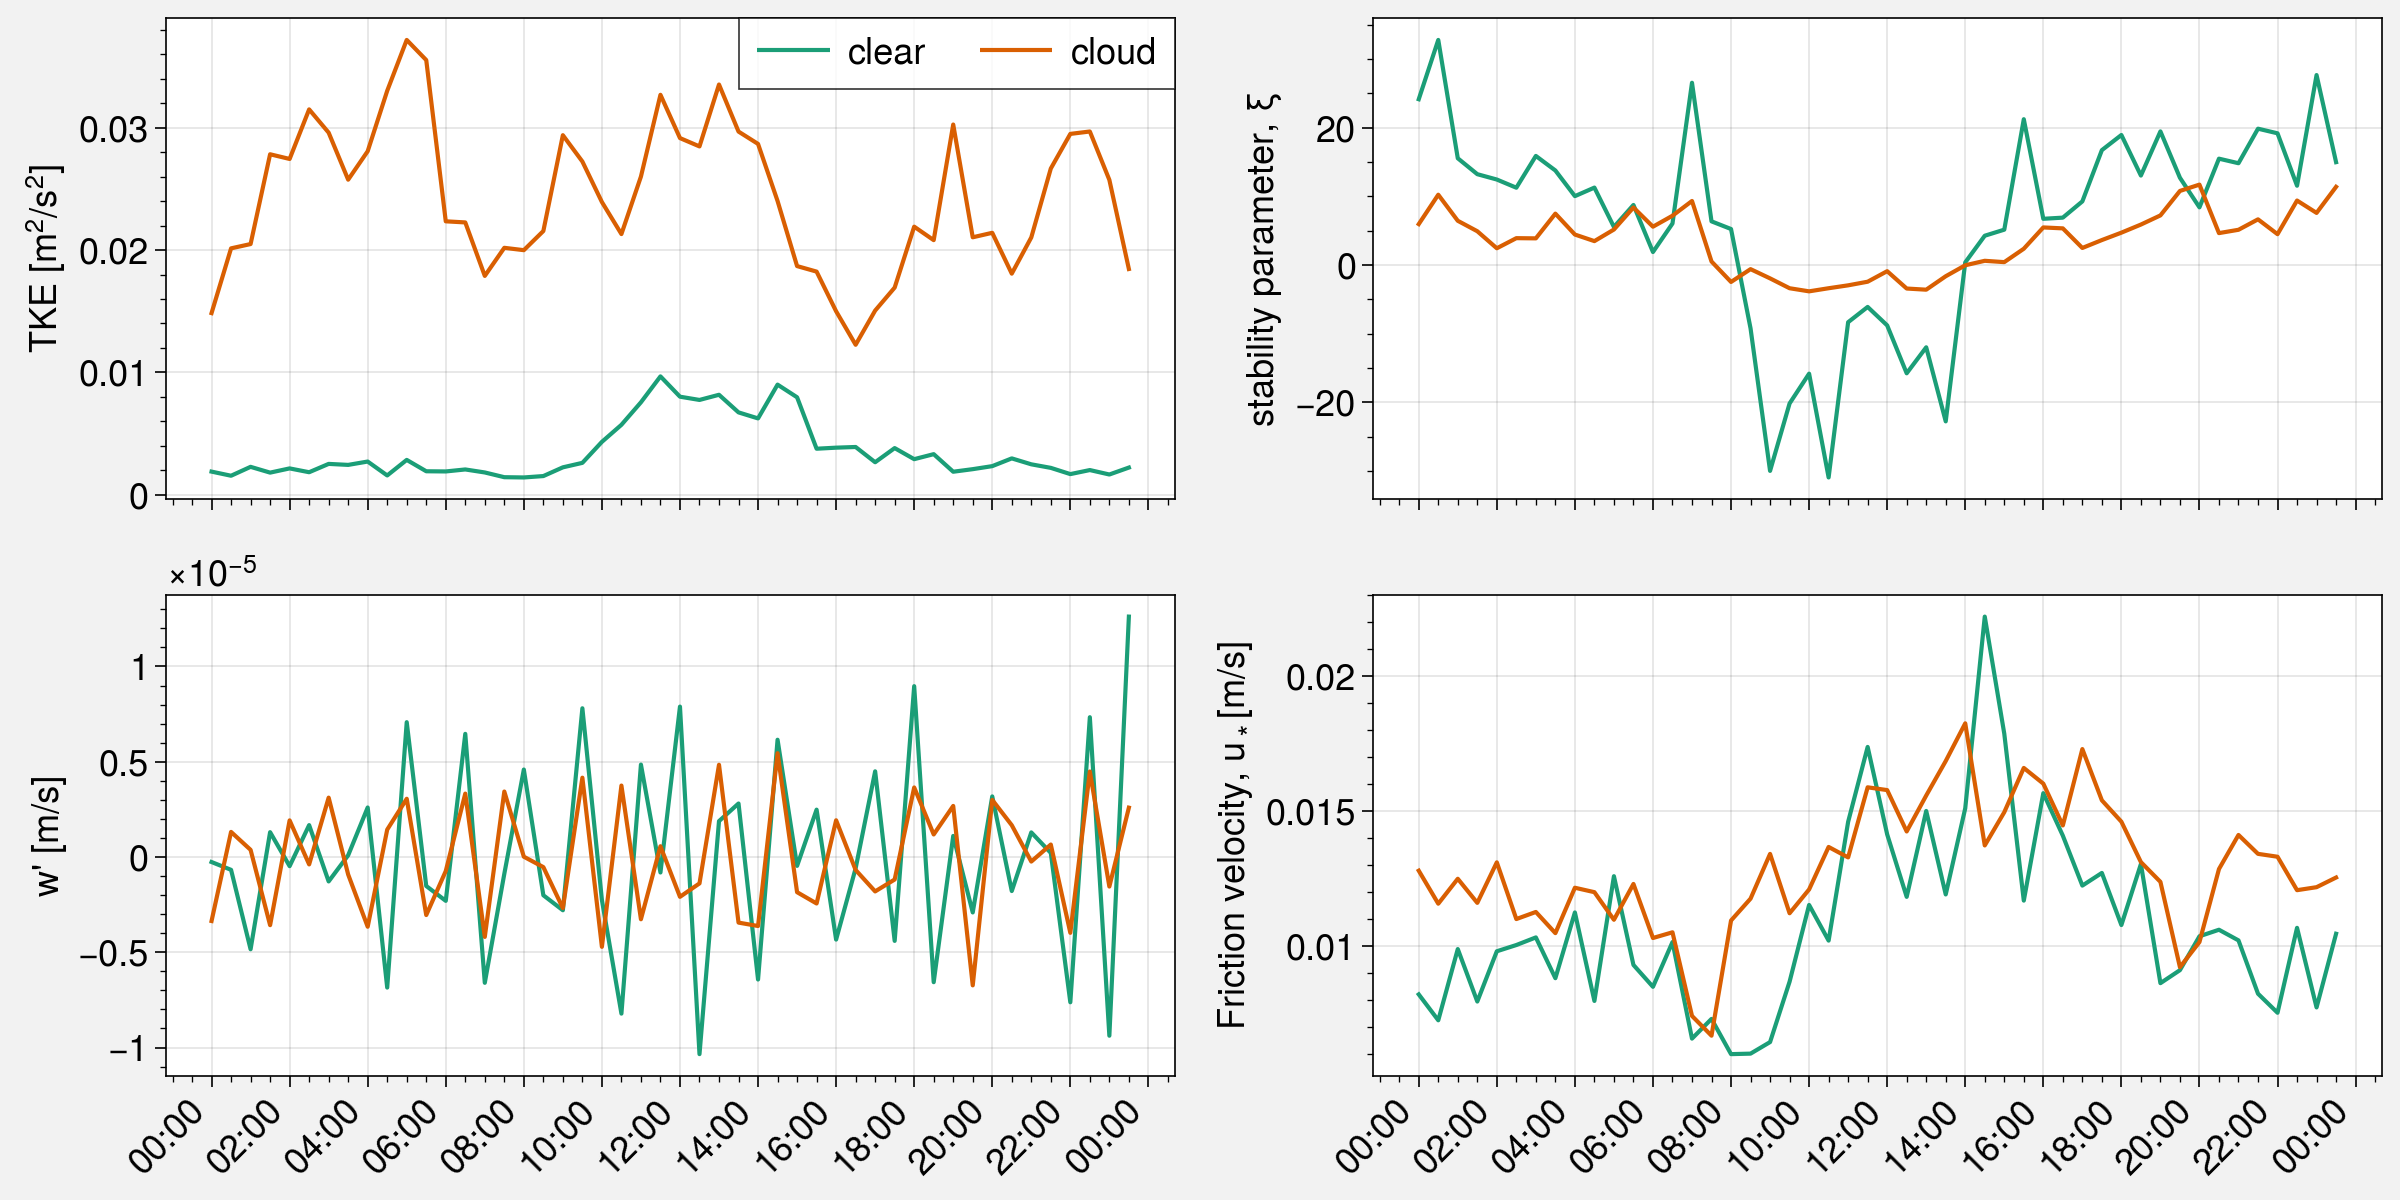

In [217]:
fig,ax = plot.subplots(sharey=False,ncols=2,nrows=2,figsize=(12,6))

ax[0].plot(x_dt,tke_clear,label='')
ax[0].plot(x_dt,tke_cloud,label='')
ax[0].format(ylabel=r'TKE [$m^2/s^2$]')


ax[1].plot(x_dt,xi_clear,label=r'')
ax[1].plot(x_dt,xi_cloud,label=r'')
ax[1].format(ylabel=r'stability parameter, $\xi$ ')


ax[2].plot(x_dt,w_clear,label='')
ax[2].plot(x_dt,w_cloud,label='')
ax[2].format(ylabel="w' [m/s]")


ax[3].plot(x_dt,ustar_clear,label='')
ax[3].plot(x_dt,ustar_cloud,label='')
ax[3].format(ylabel=r'Friction velocity, $u_\ast [m/s]$')


ax.plot(np.nan,np.nan,label='clear',color='C0')
ax.plot(np.nan,np.nan,label='cloud',color='C1')


ax[0].legend()

ax.format(
    xlocator=('hour', range(0, 24, 2)), xminorlocator=('minute', range(0, 60, 30)),
    xformatter='%H:%M', xrotation=45)

savefig(fig,'GEOF322','various_composites',['.png'])